In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import umap
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from dredFISH.Utils import __init__plots
from dredFISH.Utils import basicu
from dredFISH.Utils import miscu

In [2]:
gene_names = {
    'r1_c0': 'Sorcs3',
    'r1_c1': 'Kcnq5',
    'r1_c2': 'Chrm2',
    'r1_c4': 'Adamts2',
    
    'r2_c0': 'Kcnip3',
    'r2_c1': 'Rorb',
    'r2_c2': 'Cdh13',
    'r2_c4': 'Cntn5',
}

ftrs_order = [
    'r1_c4', # a 
    'r2_c2', # a
    'r2_c4', # a, L4
    
    'r1_c0', # b
    
    'r1_c1', # c
    
    'r1_c2', # c, L4
    
    'r2_c1', # L4
    'r2_c0', # L4

]
genes_order = [gene_names[ftr] for ftr in ftrs_order]
genes_order

['Adamts2', 'Cdh13', 'Cntn5', 'Sorcs3', 'Kcnq5', 'Chrm2', 'Rorb', 'Kcnip3']

In [3]:
pths_dat = [
    '/bigstore/GeneralStorage/fangming/projects/visctx/data_dump/testfull-aug25_epsilon0/', 
    '/bigstore/GeneralStorage/fangming/projects/visctx/data_dump/testfull-aug25_epsilon1/',
    '/bigstore/GeneralStorage/fangming/projects/visctx/data_dump/testfull-aug25_epsilon3/',
]

for i, pth_dat in enumerate(pths_dat):
    f_meta = os.path.join(pth_dat, 'roi.csv')
    f_ftrs = os.path.join(pth_dat, 'spotcount_merged.csv')
    
    _meta = pd.read_csv(f_meta, index_col=0)
    _ftrs = pd.read_csv(f_ftrs, index_col=0)
    _ftrs_cols = _ftrs.columns.values
    
    print(_meta.shape, _ftrs.shape)
    
    # check ROI should be exactly the same
    # c1,c2,c4 same
    # c0 not
    if i == 0:
        meta = _meta
        ftrs = _ftrs
    else:
        print(np.all(_meta == meta))
        print(np.all(_ftrs.filter(regex="_c[1,2,4]$", axis=1) == 
                      ftrs.filter(regex="_c[1,2,4]$", axis=1)
                    )
             )
        print(np.all(_ftrs.filter(regex="_c0$", axis=1) == 
                      ftrs.filter(regex="_c0$", axis=1)
                    )
             )
            
    
    if i == 0:
        df = meta.join(_ftrs, rsuffix=f'_v{i}')
    else:
        df = df.join(_ftrs, rsuffix=f'_v{i}')
        
    print(df.shape)
    

(12867, 4) (12867, 8)
(12867, 12)
(12867, 4) (12867, 8)
True
True
False
(12867, 20)
(12867, 4) (12867, 8)
True
True
False
(12867, 28)


In [4]:
df.columns.tolist()#['r1_c0']

['z',
 'y',
 'x',
 'area',
 'r1_c0',
 'r1_c1',
 'r1_c2',
 'r1_c4',
 'r2_c0',
 'r2_c1',
 'r2_c2',
 'r2_c4',
 'r1_c0_v1',
 'r1_c1_v1',
 'r1_c2_v1',
 'r1_c4_v1',
 'r2_c0_v1',
 'r2_c1_v1',
 'r2_c2_v1',
 'r2_c4_v1',
 'r1_c0_v2',
 'r1_c1_v2',
 'r1_c2_v2',
 'r1_c4_v2',
 'r2_c0_v2',
 'r2_c1_v2',
 'r2_c2_v2',
 'r2_c4_v2']

In [5]:
r1c0 = df[['r1_c0', 'r1_c0_v1', 'r1_c0_v2']].sort_values(['r1_c0', 'r1_c0_v1', 'r1_c0_v2'], ascending=False)

In [6]:
cond1 = r1c0.iloc[:,0]-r1c0.iloc[:,1] > 0
cond2 = r1c0.iloc[:,0]-r1c0.iloc[:,2] > 0
r1c0[cond1].shape, r1c0[cond2].shape

((1495, 3), (3139, 3))

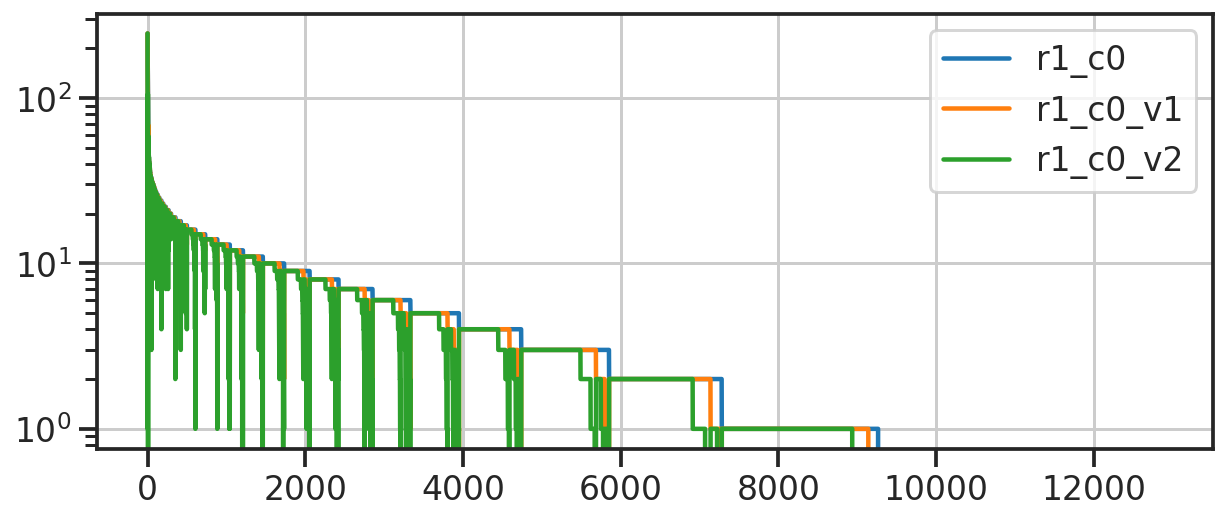

In [17]:
fig, ax = plt.subplots(1,1,figsize=(1*10,1*4))
for col in r1c0.columns:
    ax.plot(r1c0[col].values, label=col)
ax.set_yscale('log')
ax.legend()
plt.show()

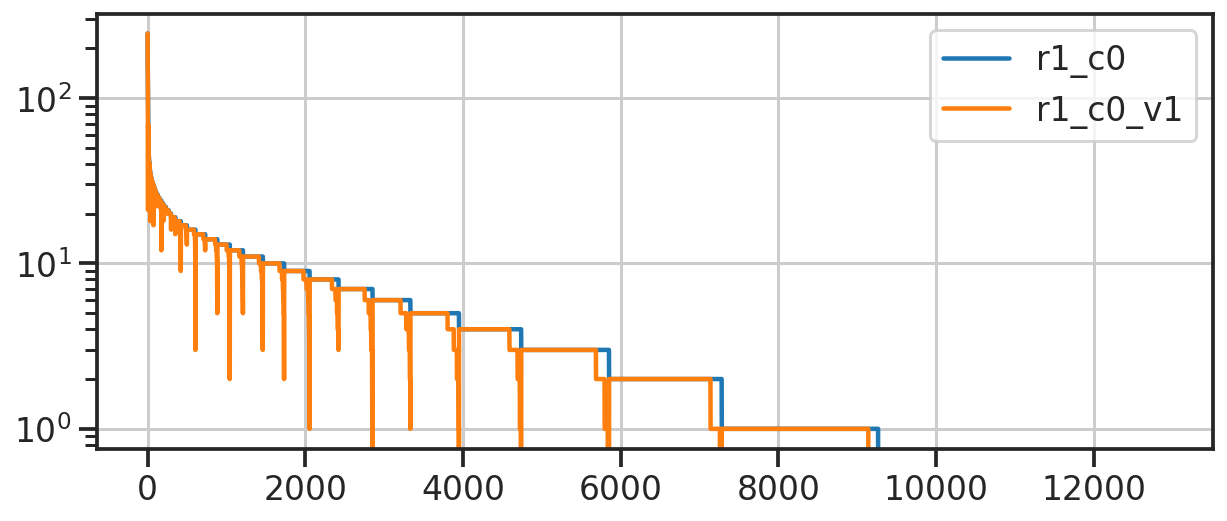

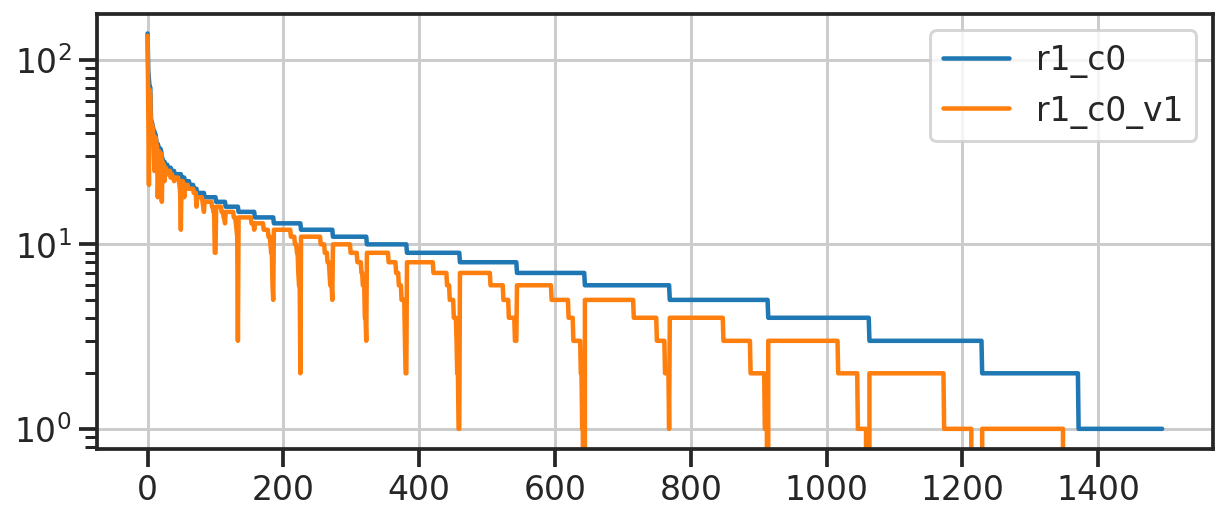

In [19]:
fig, ax = plt.subplots(1,1,figsize=(1*10,1*4))
for col in r1c0.columns[:2]:
    ax.plot(r1c0[col].values, label=col)
ax.set_yscale('log')
ax.legend()
plt.show()

fig, ax = plt.subplots(1,1,figsize=(1*10,1*4))
for col in r1c0.columns[:2]:
    ax.plot(r1c0[cond1][col].values, label=col)
ax.set_yscale('log')
ax.legend()
plt.show()

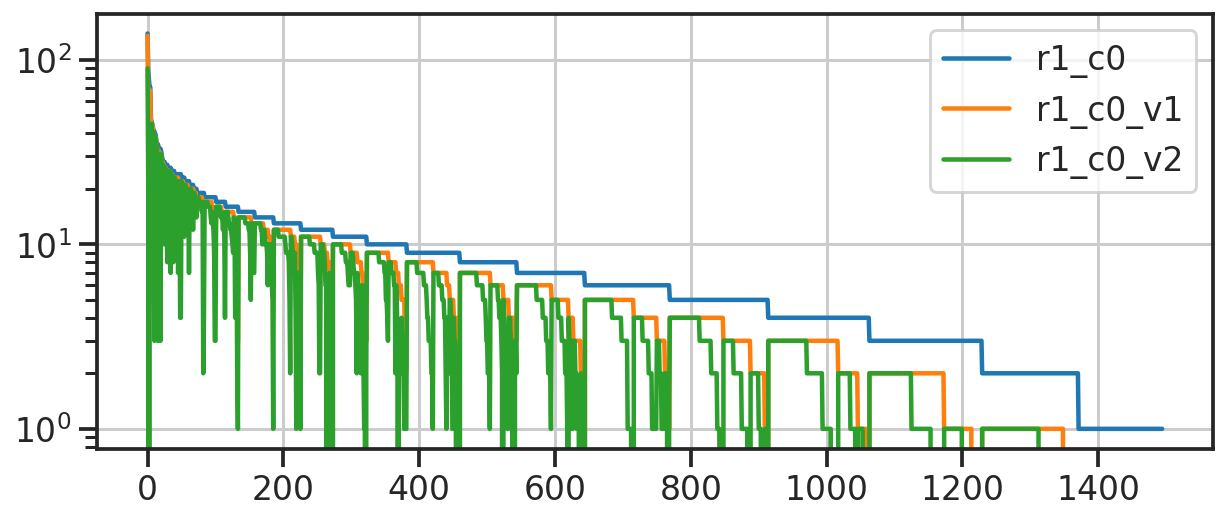

In [20]:
fig, ax = plt.subplots(1,1,figsize=(1*10,1*4))
for col in r1c0.columns:
    ax.plot(r1c0[cond1][col].values, label=col)
ax.set_yscale('log')
ax.legend()
plt.show()

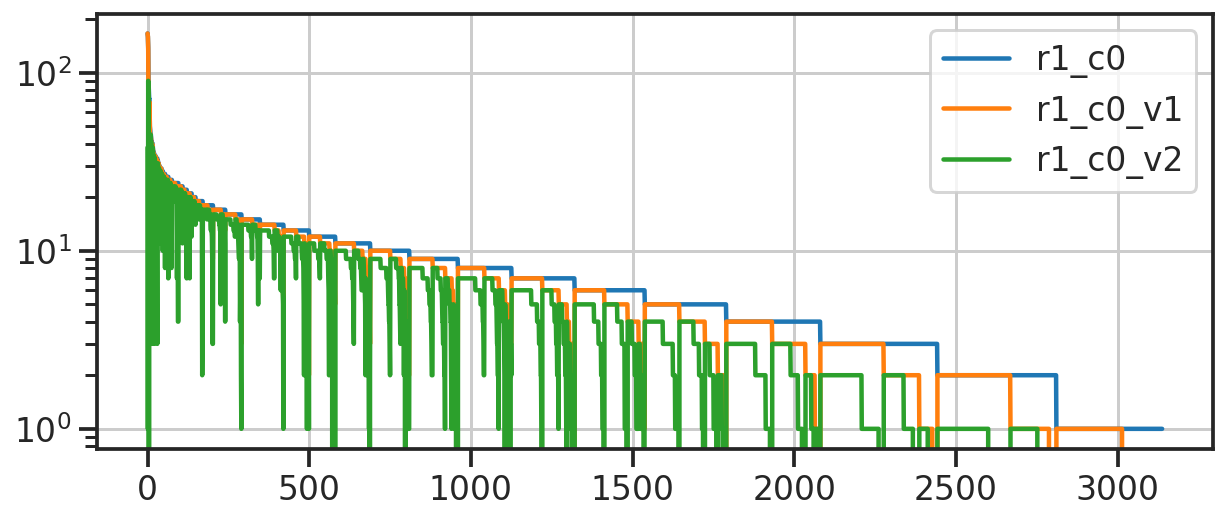

In [21]:
fig, ax = plt.subplots(1,1,figsize=(1*10,1*4))
for col in r1c0.columns:
    ax.plot(r1c0[cond2][col].values, label=col)
ax.set_yscale('log')
ax.legend()
plt.show()

<AxesSubplot:xlabel='r1_c0_v2', ylabel='r1_c4_v2'>

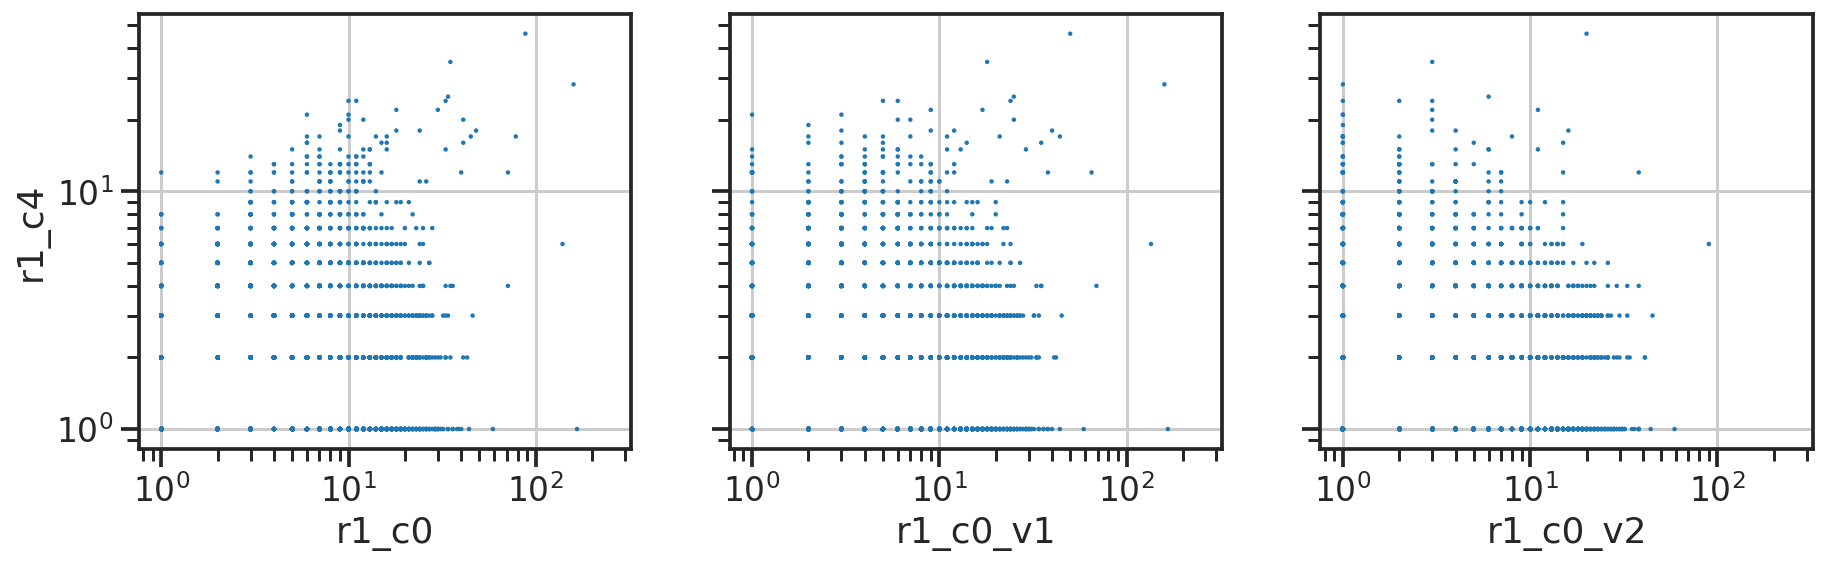

In [11]:
fig, axs = plt.subplots(1,3,figsize=(3*5,1*4), sharey=True)
ax = axs[0]
ax.set_xscale('log')
ax.set_yscale('log')
sns.scatterplot(data=df, x='r1_c0', y='r1_c4', s=5, edgecolor='none', ax=ax)
ax = axs[1]
ax.set_xscale('log')
ax.set_yscale('log')
sns.scatterplot(data=df, x='r1_c0_v1', y='r1_c4_v1', s=5, edgecolor='none', ax=ax)
ax = axs[2]
ax.set_xscale('log')
ax.set_yscale('log')
sns.scatterplot(data=df, x='r1_c0_v2', y='r1_c4_v2', s=5, edgecolor='none', ax=ax)


<AxesSubplot:xlabel='r1_c0', ylabel='r1_c4'>

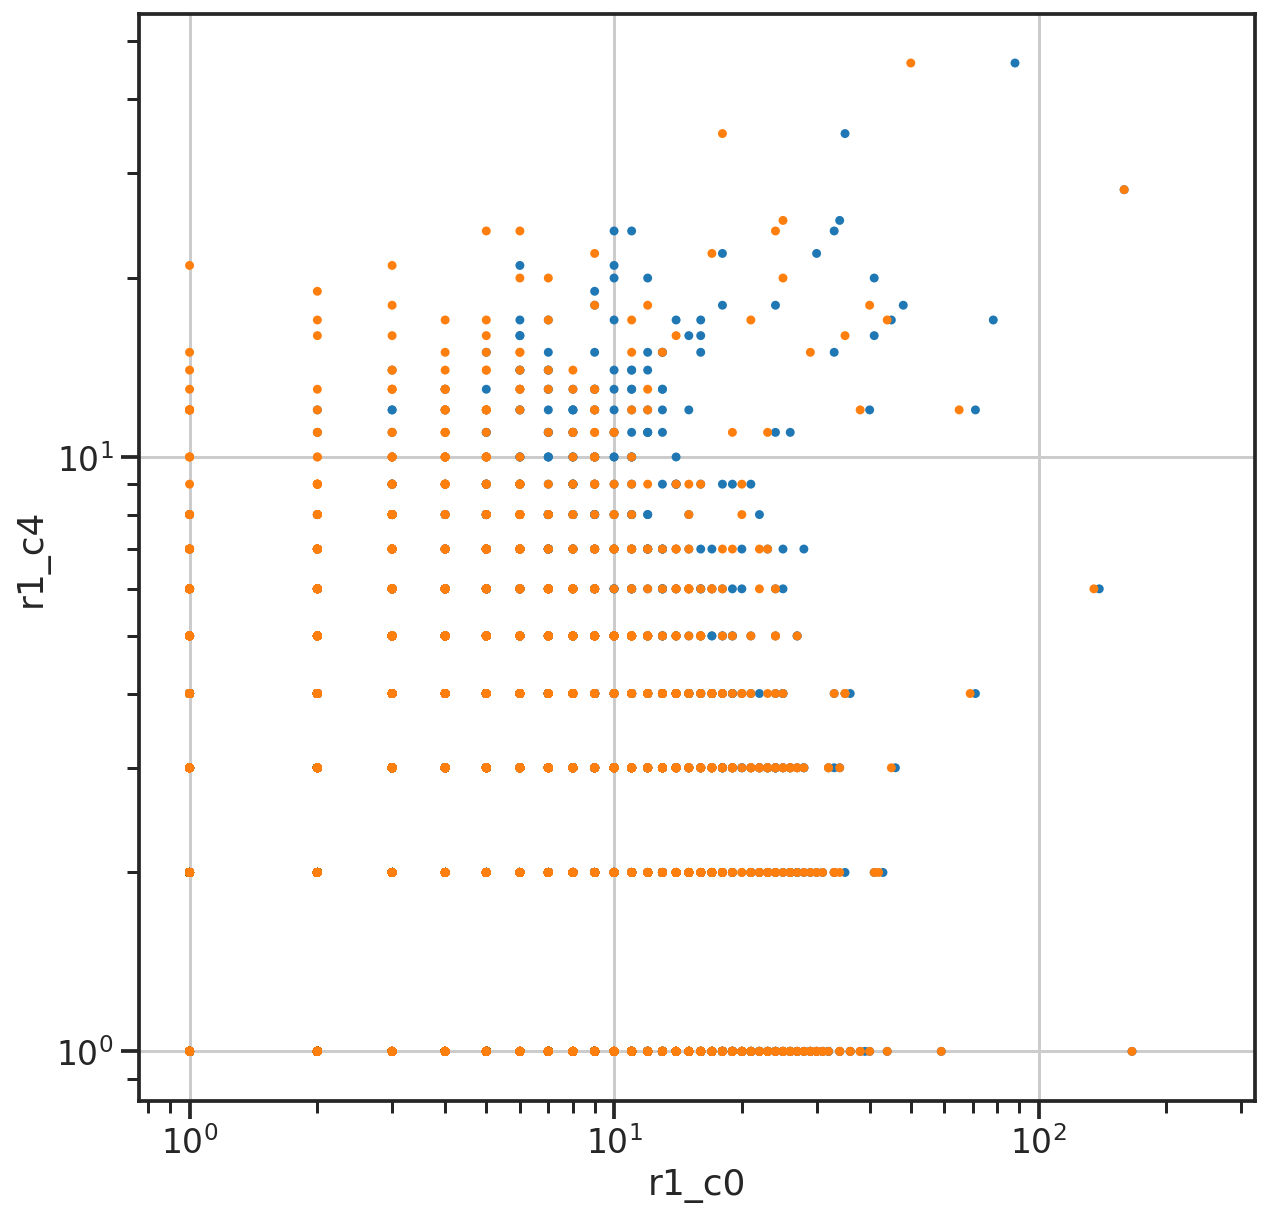

In [22]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.set_xscale('log')
ax.set_yscale('log')
sns.scatterplot(data=df, x='r1_c0', y='r1_c4', s=20, edgecolor='none', ax=ax)
sns.scatterplot(data=df, x='r1_c0_v1', y='r1_c4_v1', s=20, edgecolor='none', ax=ax)
# sns.scatterplot(data=df, x='r1_c0_v2', y='r1_c4_v2', s=20, edgecolor='none', ax=ax)

<AxesSubplot:xlabel='r1_c0', ylabel='r1_c4'>

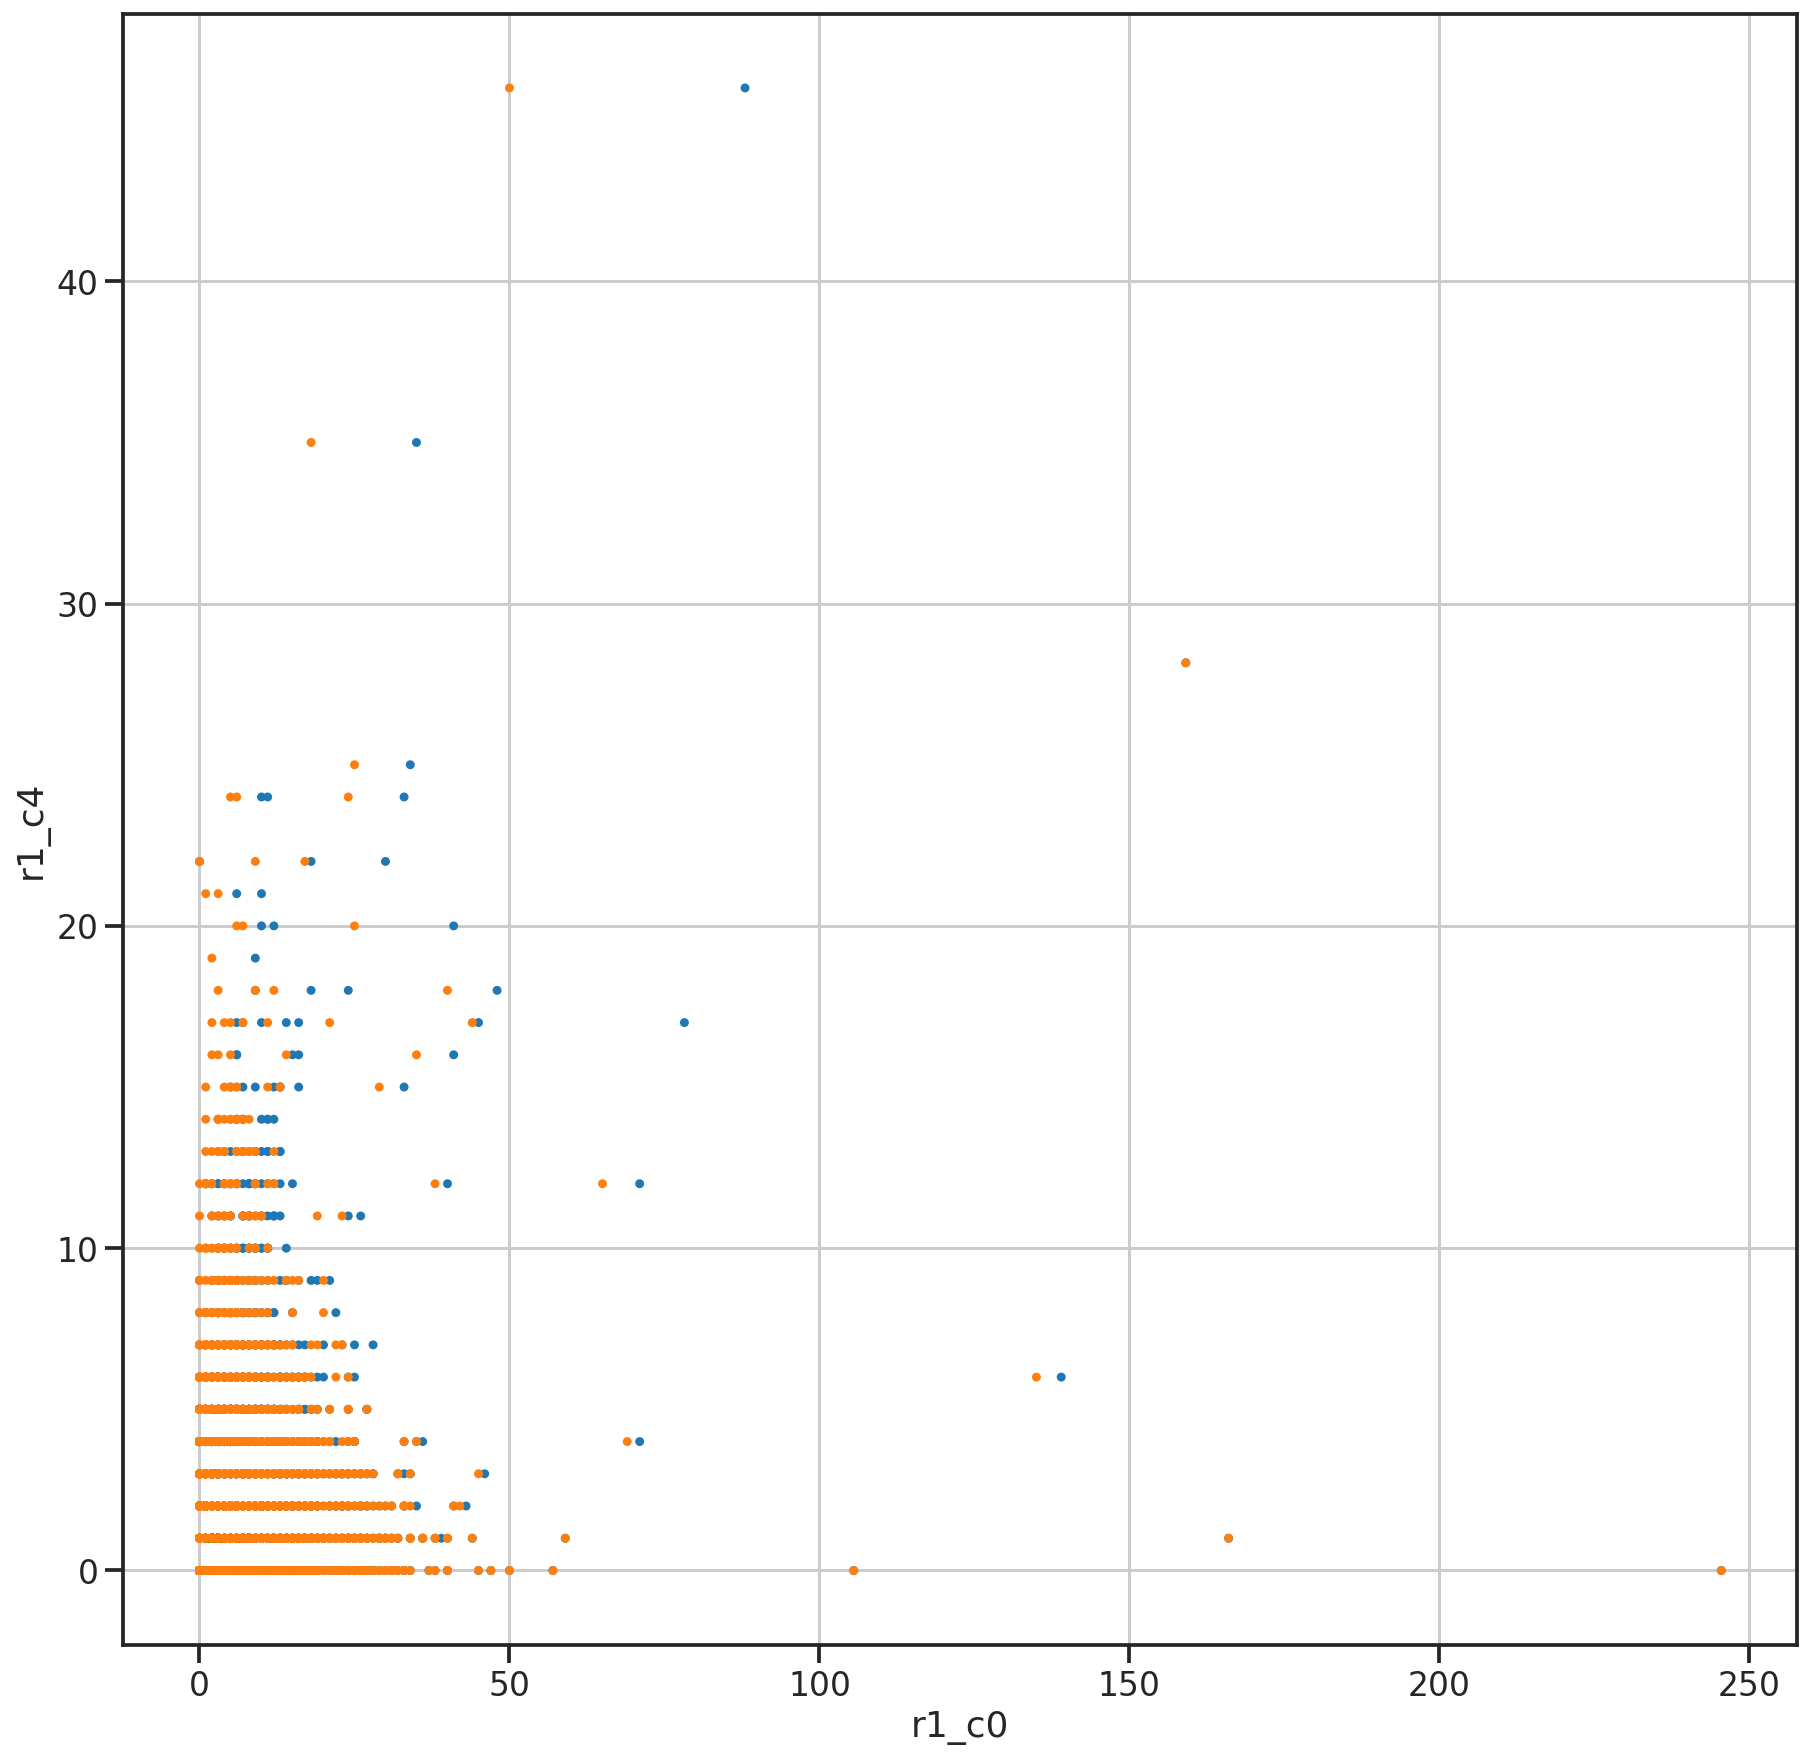

In [13]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
sns.scatterplot(data=df, x='r1_c0', y='r1_c4', s=20, edgecolor='none', ax=ax)
sns.scatterplot(data=df, x='r1_c0_v1', y='r1_c4_v1', s=20, edgecolor='none', ax=ax)
# sns.scatterplot(data=df, x='r1_c0_v2', y='r1_c4_v2', s=20, edgecolor='none', ax=ax)